In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [2]:
df=pd.read_csv('./final_chart_in_out.csv',encoding='utf-8')

In [3]:
df=df[df['year_y'].isin([2022,2023,2024])]

In [4]:
df

,artist_song,genre,like,camelot,bpm,energy,danceability,acousticness,year_y,classes
193,IVE (아이브) LOVE DIVE,댄스,122601,12A,118,71,70.0,0.0,2022.0,0
194,i-dle (아이들) TOMBOY,록/메탈,143106,12A,124,87,76.0,1.0,2022.0,0
195,김민석 취중고백,발라드,21014,1B,122,45,56.0,58.0,2022.0,0
196,멜로망스 사랑인가 봐,발라드,88639,4B,172,73,40.0,51.0,2022.0,0
197,임영웅 사랑은 늘 도망가,발라드,147432,4B,131,44,40.0,65.0,2022.0,0
...,...,...,...,...,...,...,...,...,...,...
1229,볼빨간사춘기 Lips (Feat. 지젤 of aespa),인디음악,256554,9A,63,67,26.0,0.0,2024.0,1
1230,H1-KEY (하이키) 뜨거워지자 (Let It Burn),댄스,6389,1A,179,48,52.0,23.0,2024.0,1
1231,연변대학최씨 바람이 불지 않은 것처럼,발라드,608,1A,170,66,55.0,81.0,2024.0,1
1232,츄 (CHUU) Strawberry Rush,댄스,11807,10B,158,84,59.0,15.0,2024.0,1


In [41]:
pd.set_option('display.max_rows',10000)

In [ ]:
민트	#1ABC9C	산뜻하고 시원한 느낌
코랄핑크	#FF6B6B	포인트로 강렬한 인상
로얄 블루	#2980B9	세련된 진한 파랑
퍼플그레이	#8E44AD	지적인 보라
다크 민트	#16A085	고급스러운 청록색
선셋 오렌지	#E67E22	따뜻하고 강렬한 느낌
라이트 골드	#F1C40F	고급스럽고 밝은 황색
차콜 블랙	#2C3E50	깊은 남색, 차분한 느낌

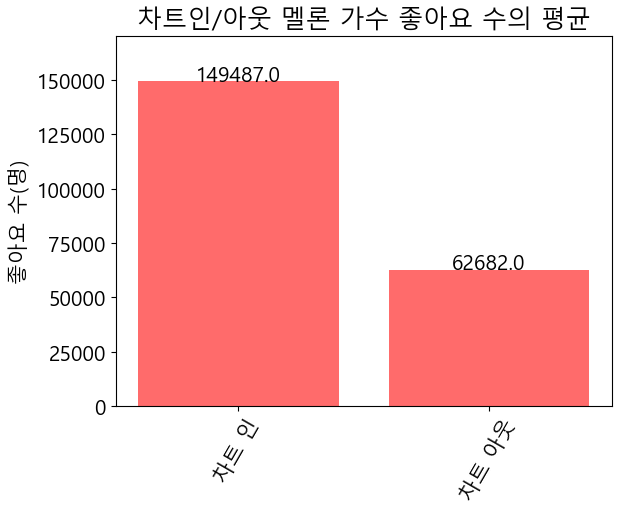

In [19]:
plt.title('차트인/아웃 멜론 가수 좋아요 수의 평균')
plt.bar(x=['차트 인','차트 아웃'],height=df.groupby('classes')['like'].mean(),
       color='#FF6B6B')
plt.xticks(rotation=60)
for a,b in enumerate(df.groupby('classes')['like'].mean()):
    plt.text(a,b+100,np.round(b),ha='center')
plt.ylabel('좋아요 수(명)')
plt.ylim(0,170000)
plt.show()

Text(0, 0.5, '좋아요 수(명)')

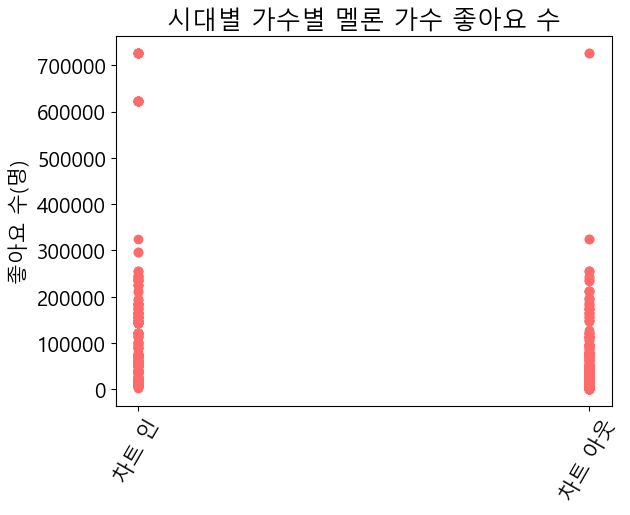

In [14]:
plt.title('시대별 가수별 멜론 가수 좋아요 수')
plt.scatter(x=df['classes'],y=df['like'],color='#FF6B6B')
plt.xticks([0, 1],['차트 인','차트 아웃'],rotation=60)
plt.ylabel('좋아요 수(명)')

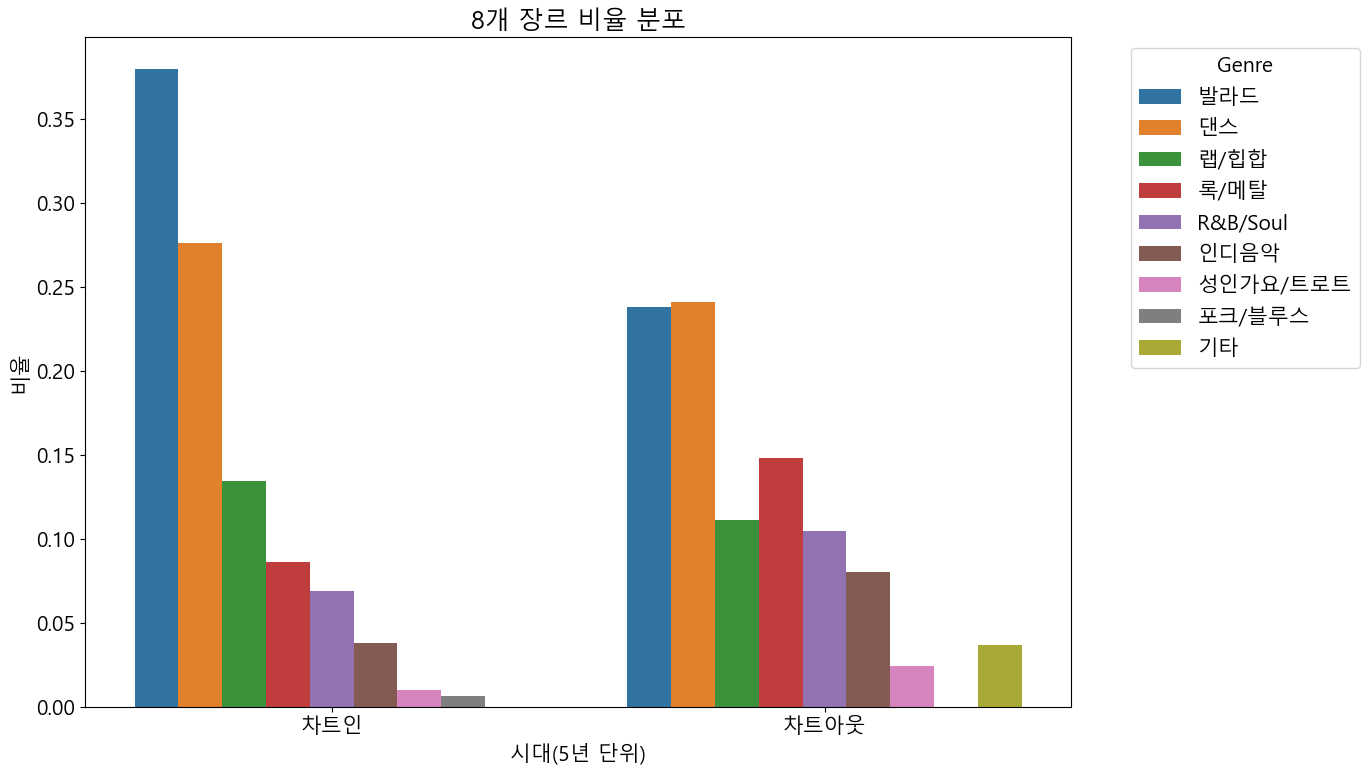

In [20]:
genre_counts = df.groupby(['classes', 'genre']).size().reset_index(name='count')

# 클래스별 총합 기준 비율 계산
genre_counts['ratio'] = genre_counts['count'] / genre_counts.groupby('classes')['count'].transform('sum')

# 클래스별 상위 8개 장르 (비율 기준으로 정렬해도 되지만 여기선 count 기준 유지)
top_genres_per_class = (
    genre_counts
    .sort_values(['classes', 'count'], ascending=[True, False])
    .groupby('classes')
    .head(8)
)

# 시각화 (비율)
plt.figure(figsize=(14, 8))
sns.barplot(data=top_genres_per_class, x='classes', y='ratio', hue='genre')
plt.title("8개 장르 비율 분포")
plt.xlabel("시대(5년 단위)")
plt.ylabel("비율")
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks([0,1],['차트인','차트아웃'])
plt.tight_layout()
plt.show()

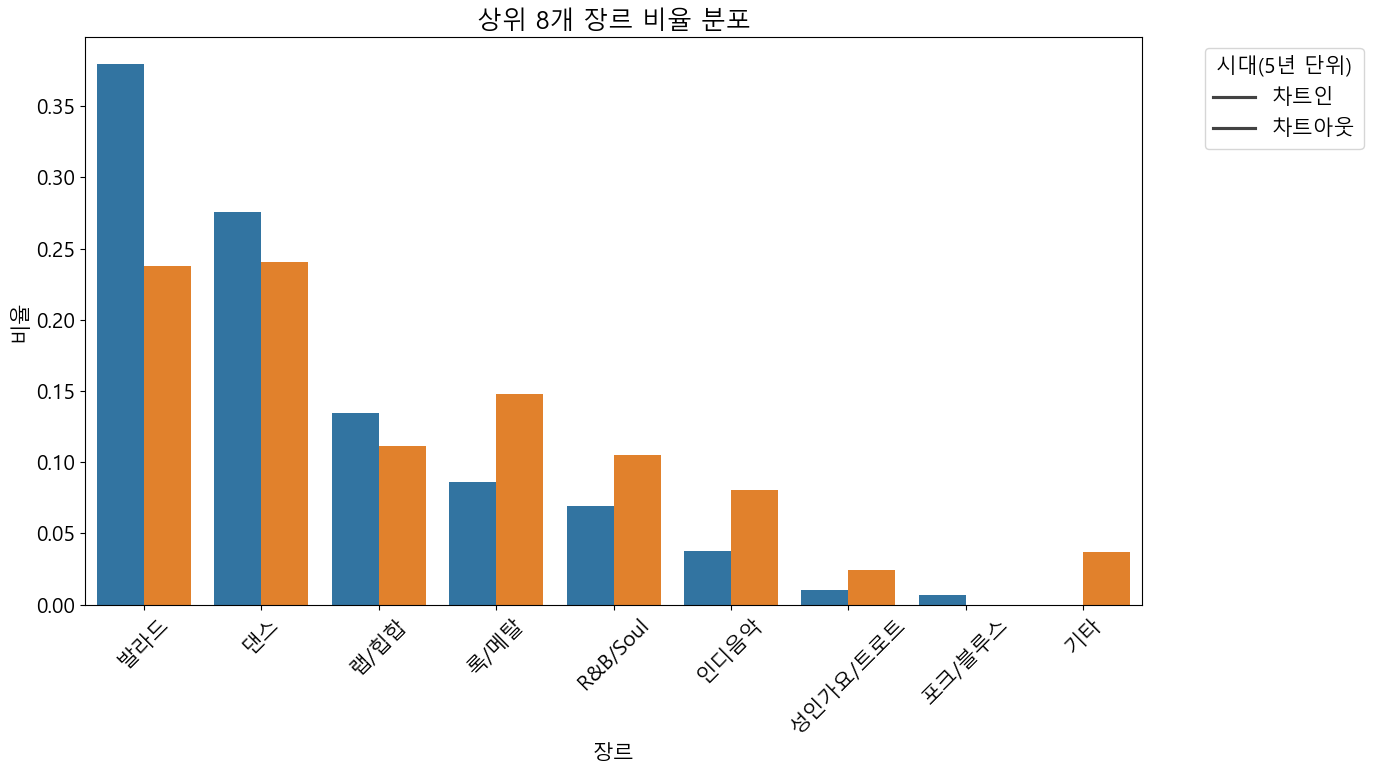

In [21]:
genre_counts = df.groupby(['classes', 'genre']).size().reset_index(name='count')

# 클래스별 총합 기준 비율 계산
genre_counts['ratio'] = genre_counts['count'] / genre_counts.groupby('classes')['count'].transform('sum')

# 클래스별 상위 8개 장르 (비율 기준으로 정렬해도 되지만 여기선 count 기준 유지)
top_genres_per_class = (
    genre_counts
    .sort_values(['classes', 'count'], ascending=[True, False])
    .groupby('classes')
    .head(8)
)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_genres_per_class, x='genre', y='ratio', hue='classes')
plt.title("상위 8개 장르 비율 분포")
plt.xlabel("장르")
plt.ylabel("비율")
plt.legend(title='시대(5년 단위)',labels=['차트인','차트아웃'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

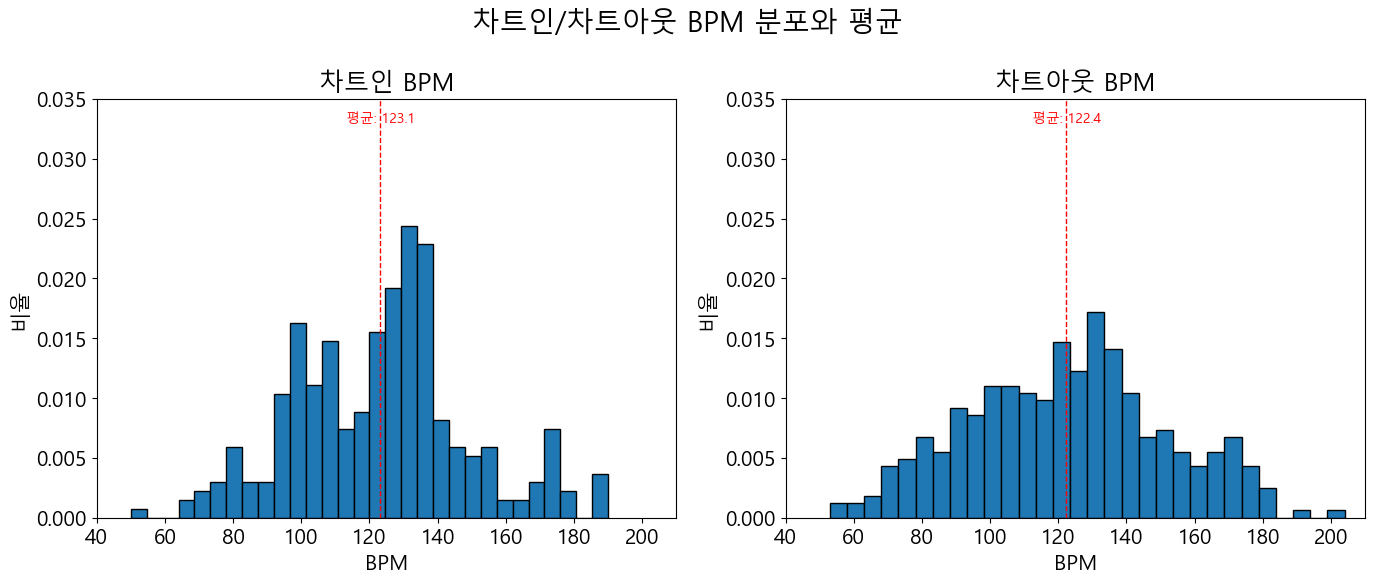

In [12]:
# classes: 0 = 차트인, 1 = 차트아웃
classes = sorted(df['classes'].unique())

# 1x2 그리드로 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('차트인/차트아웃 BPM 분포와 평균', fontsize=20)

# 클래스 이름 (레전드용)
names = ['차트인', '차트아웃']

for i, cls in enumerate(classes):
    class_data = df[df['classes'] == cls]
    mean_bpm = class_data['bpm'].mean()

    axes[i].hist(class_data['bpm'], bins=30, edgecolor='black', density=True)
    axes[i].axvline(mean_bpm, color='red', linestyle='--', linewidth=1)
    axes[i].text(mean_bpm, 0.033, f'평균: {mean_bpm:.1f}', color='red', ha='center', fontsize=10)

    axes[i].set_title(f'{names[i]} BPM')
    axes[i].set_xlabel('BPM')
    axes[i].set_ylabel('비율')
    axes[i].set_xlim(40, 210)
    axes[i].set_ylim(0, 0.035)

plt.tight_layout()
plt.show()

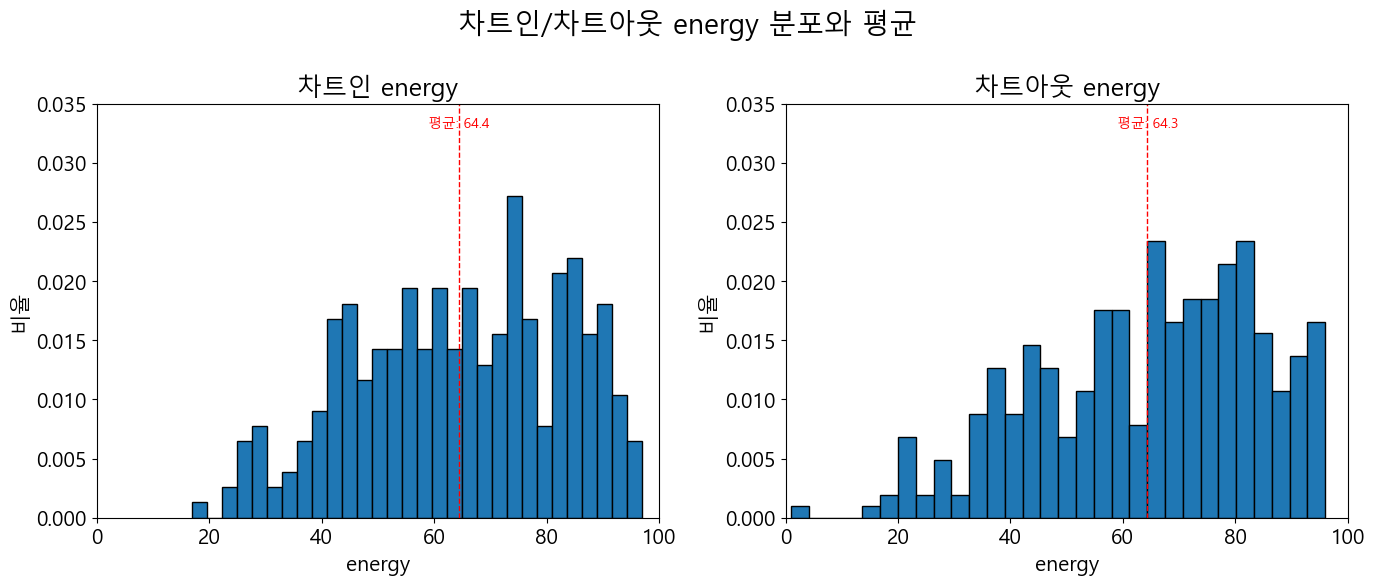

In [14]:
# classes: 0 = 차트인, 1 = 차트아웃
classes = sorted(df['classes'].unique())

# 1x2 그리드로 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('차트인/차트아웃 energy 분포와 평균', fontsize=20)

# 클래스 이름 (레전드용)
names = ['차트인', '차트아웃']

for i, cls in enumerate(classes):
    class_data = df[df['classes'] == cls]
    mean_bpm = class_data['energy'].mean()

    axes[i].hist(class_data['energy'], bins=30, edgecolor='black', density=True)
    axes[i].axvline(mean_bpm, color='red', linestyle='--', linewidth=1)
    axes[i].text(mean_bpm, 0.033, f'평균: {mean_bpm:.1f}', color='red', ha='center', fontsize=10)

    axes[i].set_title(f'{names[i]} energy')
    axes[i].set_xlabel('energy')
    axes[i].set_ylabel('비율')
    axes[i].set_xlim(0, 100)
    axes[i].set_ylim(0, 0.035)

plt.tight_layout()
plt.show()

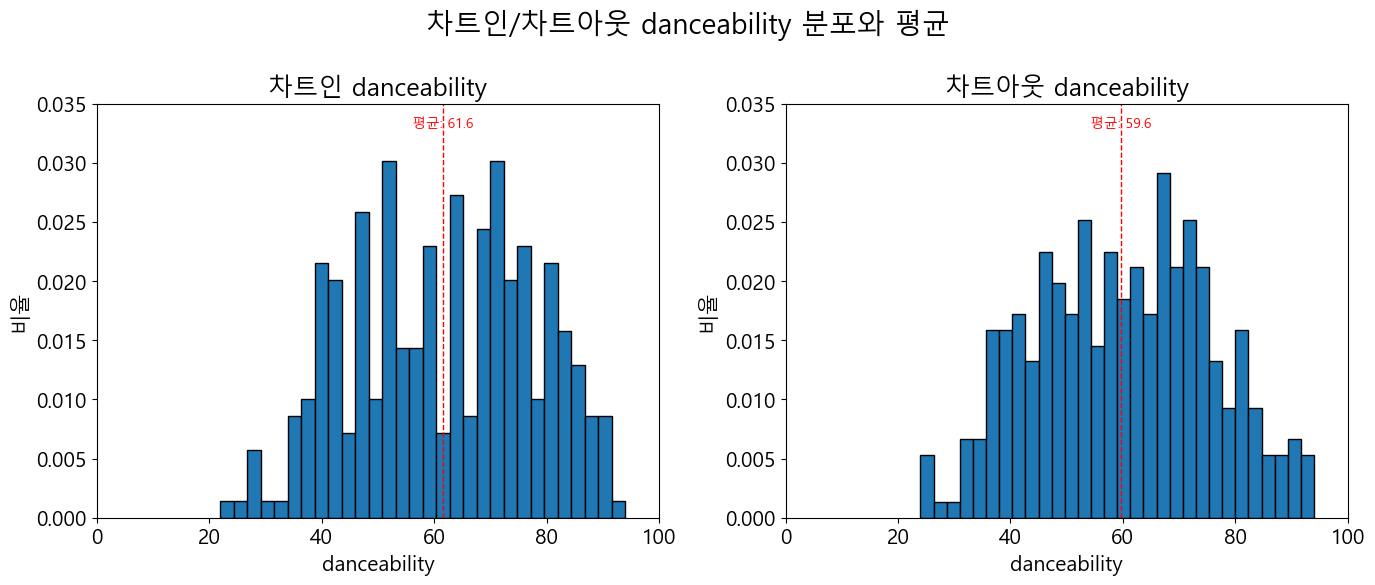

In [15]:
# classes: 0 = 차트인, 1 = 차트아웃
classes = sorted(df['classes'].unique())

# 1x2 그리드로 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('차트인/차트아웃 danceability 분포와 평균', fontsize=20)

# 클래스 이름 (레전드용)
names = ['차트인', '차트아웃']

for i, cls in enumerate(classes):
    class_data = df[df['classes'] == cls]
    mean_bpm = class_data['danceability'].mean()

    axes[i].hist(class_data['danceability'], bins=30, edgecolor='black', density=True)
    axes[i].axvline(mean_bpm, color='red', linestyle='--', linewidth=1)
    axes[i].text(mean_bpm, 0.033, f'평균: {mean_bpm:.1f}', color='red', ha='center', fontsize=10)

    axes[i].set_title(f'{names[i]} danceability')
    axes[i].set_xlabel('danceability')
    axes[i].set_ylabel('비율')
    axes[i].set_xlim(0, 100)
    axes[i].set_ylim(0, 0.035)

plt.tight_layout()
plt.show()

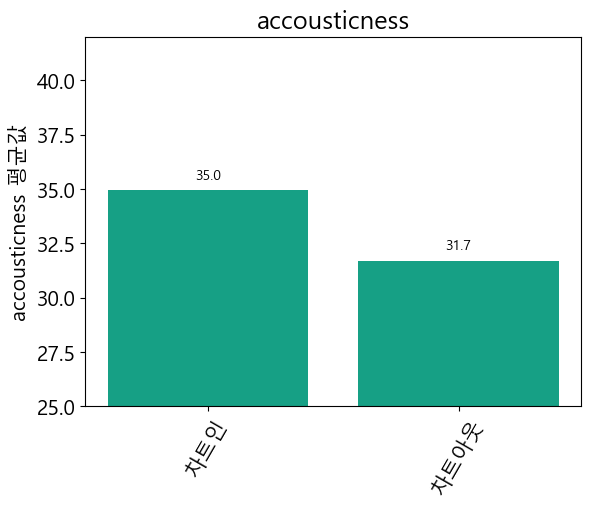

In [18]:
plt.title('accousticness')
plt.bar(range(2),list(df.groupby('classes')['acousticness'].mean()),color='#16A085')
plt.ylabel('accousticness 평균값')
plt.ylim(25,42)
plt.xticks([0, 1],['차트인','차트아웃'],rotation=60)
for a,b in enumerate(list(df.groupby('classes')['acousticness'].mean())):
    plt.text(a,b+0.5,np.round(b,1),ha='center',size=10)
plt.show()


In [ ]:
df=pd.read_csv('./chart_in_visualization.csv',encoding='utf-8')

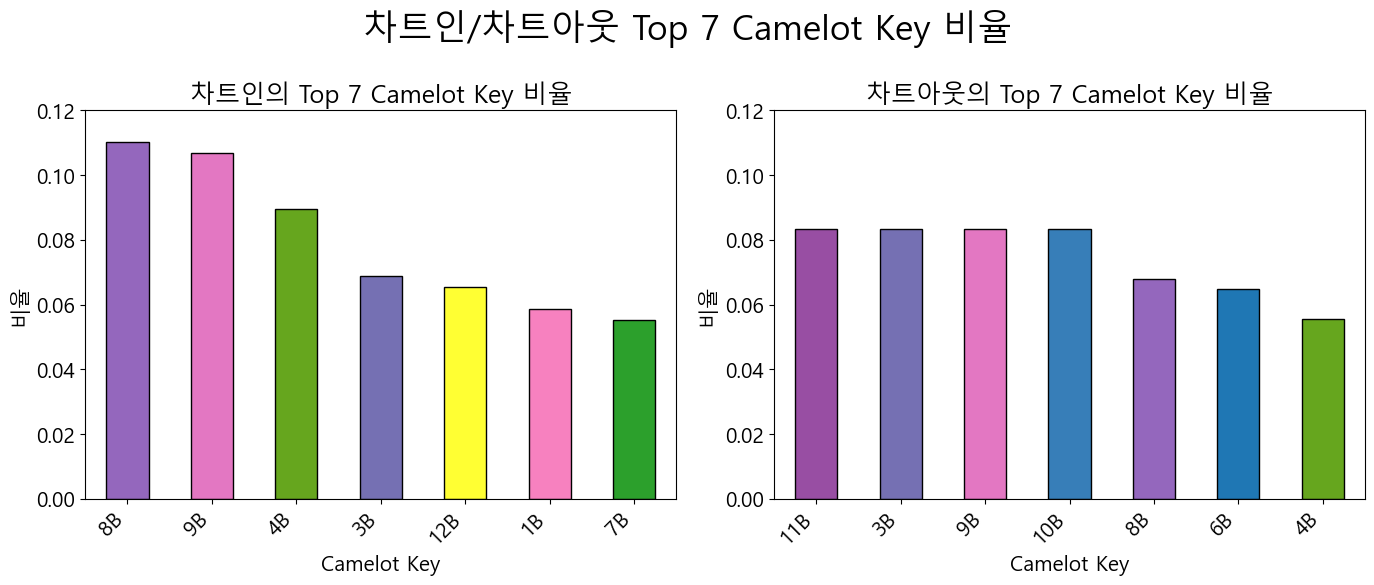

In [23]:
import matplotlib.pyplot as plt
import matplotlib
from itertools import cycle

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

# camelot key 고정 및 색상 매핑
camelot_keys = sorted(df['camelot'].dropna().unique())

# 색상 팔레트 조합 (총 27개 진한 색)
set1 = plt.get_cmap('Set1').colors
dark2 = plt.get_cmap('Dark2').colors
tab10 = plt.get_cmap('tab10').colors
combined_colors = list(set1) + list(dark2) + list(tab10)
color_cycle = cycle(combined_colors)
color_dict = {key: next(color_cycle) for key in camelot_keys}

# 클래스 설정: 0 = 차트인, 1 = 차트아웃
classes = sorted(df['classes'].unique())
names = ['차트인', '차트아웃']

# 1x2 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('차트인/차트아웃 Top 7 Camelot Key 비율', fontsize=25)

for i, cls in enumerate(classes):
    ax = axes[i]
    class_data = df[df['classes'] == cls]

    if not class_data.empty:
        camelot_counts = class_data['camelot'].value_counts()
        camelot_proportions = camelot_counts / len(class_data)

        # 상위 7개 Camelot key
        top_proportions = camelot_proportions.head(7)
        bar_colors = [color_dict.get(k, 'gray') for k in top_proportions.index]

        top_proportions.plot(kind='bar', ax=ax, color=bar_colors, edgecolor='black')
        ax.set_title(f'{names[i]}의 Top 7 Camelot Key 비율')
        ax.set_xlabel('Camelot Key')
        ax.set_ylabel('비율')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylim(0,0.12)

    else:
        fig.delaxes(ax)
        print(f"No data for class {cls} (subplot {i}).")

plt.tight_layout()
plt.show()

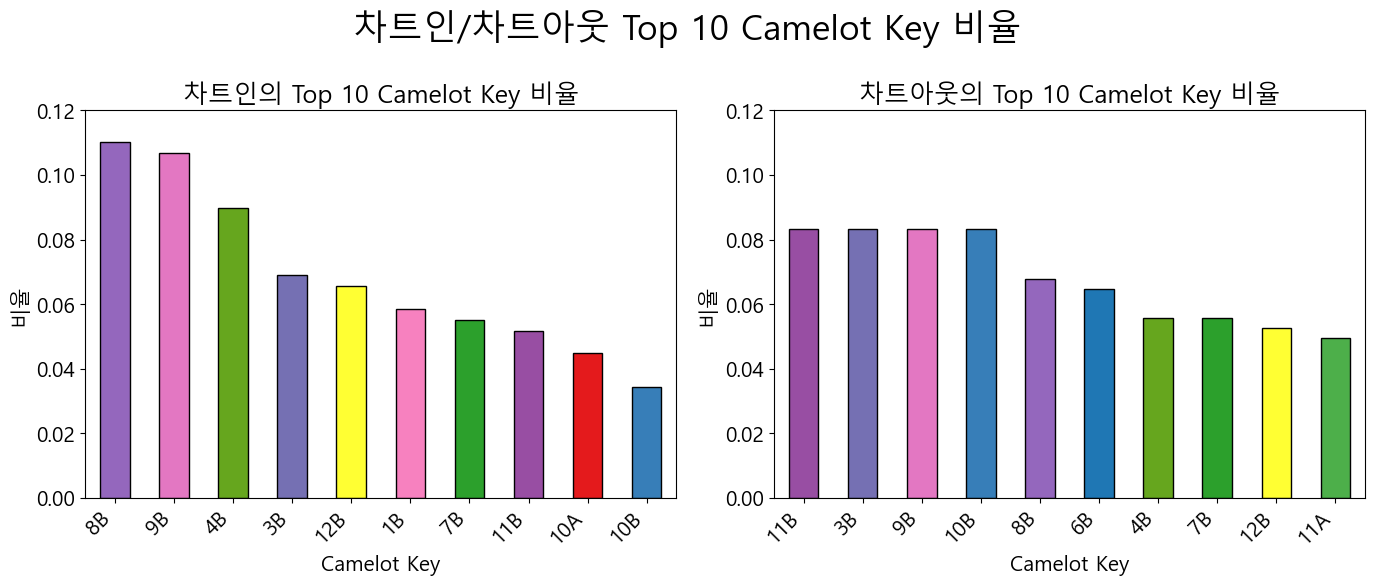

In [25]:
import matplotlib.pyplot as plt
import matplotlib
from itertools import cycle

matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

# camelot key 고정 및 색상 매핑
camelot_keys = sorted(df['camelot'].dropna().unique())

# 색상 팔레트 조합 (총 27개 진한 색)
set1 = plt.get_cmap('Set1').colors
dark2 = plt.get_cmap('Dark2').colors
tab10 = plt.get_cmap('tab10').colors
combined_colors = list(set1) + list(dark2) + list(tab10)
color_cycle = cycle(combined_colors)
color_dict = {key: next(color_cycle) for key in camelot_keys}

# 클래스 설정: 0 = 차트인, 1 = 차트아웃
classes = sorted(df['classes'].unique())
names = ['차트인', '차트아웃']

# 1x2 subplot 생성
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('차트인/차트아웃 Top 10 Camelot Key 비율', fontsize=25)

for i, cls in enumerate(classes):
    ax = axes[i]
    class_data = df[df['classes'] == cls]

    if not class_data.empty:
        camelot_counts = class_data['camelot'].value_counts()
        camelot_proportions = camelot_counts / len(class_data)

        # 상위 7개 Camelot key
        top_proportions = camelot_proportions.head(10)
        bar_colors = [color_dict.get(k, 'gray') for k in top_proportions.index]

        top_proportions.plot(kind='bar', ax=ax, color=bar_colors, edgecolor='black')
        ax.set_title(f'{names[i]}의 Top 10 Camelot Key 비율')
        ax.set_xlabel('Camelot Key')
        ax.set_ylabel('비율')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylim(0,0.12)

    else:
        fig.delaxes(ax)
        print(f"No data for class {cls} (subplot {i}).")

plt.tight_layout()
plt.show()

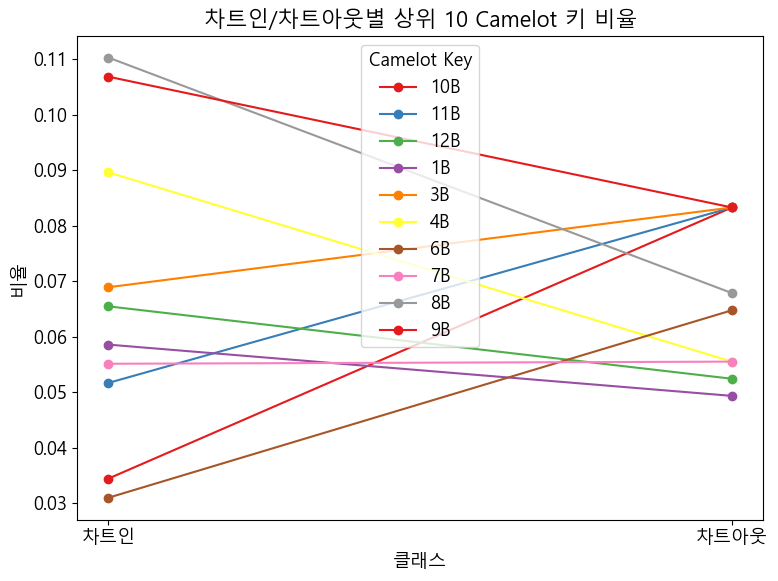

In [26]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# 한글 폰트 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  
matplotlib.rcParams['font.size'] = 13 
matplotlib.rcParams['axes.unicode_minus'] = False

# 1. 클래스-카멜롯별 개수 계산 후 비율 구하기
pivot_data = (
    df.groupby(['classes', 'camelot'])
    .size()
    .reset_index(name='count')
)

# 클래스별 총합 대비 비율 계산
pivot_data['proportion'] = pivot_data.groupby('classes')['count'].transform(lambda x: x / x.sum())

# 2. 전체에서 많이 등장한 camelot 키 상위 10개 선택
top_camelots = (
    df['camelot'].value_counts()
    .head(10)
    .index
)

# 3. 해당 키만 필터링해서 pivot
plot_df = pivot_data[pivot_data['camelot'].isin(top_camelots)]
plot_pivot = plot_df.pivot(index='classes', columns='camelot', values='proportion')
plot_pivot = plot_pivot.fillna(0).sort_index()

# 4. 진한 색상 팔레트 (Set1 사용)
colors = plt.get_cmap('Set1').colors
color_dict = {key: colors[i % len(colors)] for i, key in enumerate(plot_pivot.columns)}

# 5. 선 그래프 그리기
plt.figure(figsize=(8, 6))
for camelot in plot_pivot.columns:
    plt.plot(
        plot_pivot.index, 
        plot_pivot[camelot], 
        label=camelot, 
        color=color_dict[camelot], 
        marker='o'
    )

plt.title('차트인/차트아웃별 상위 10 Camelot 키 비율')
plt.xlabel('클래스')
plt.ylabel('비율')
plt.xticks([0, 1], ['차트인', '차트아웃'])
plt.legend(title='Camelot Key')
plt.tight_layout()
plt.show()

In [29]:
def ab(x):
    return x[-1]
df['camelot'].apply(ab)

193     A
194     A
195     B
196     B
197     B
       ..
1229    A
1230    A
1231    A
1232    B
1233    B
Name: camelot, Length: 614, dtype: object

In [30]:
df['major_minor']=df['camelot'].apply(ab)

In [34]:
np.unique(df['major_minor'],return_counts=True)

(array(['A', 'B'], dtype=object), array([160, 454], dtype=int64))

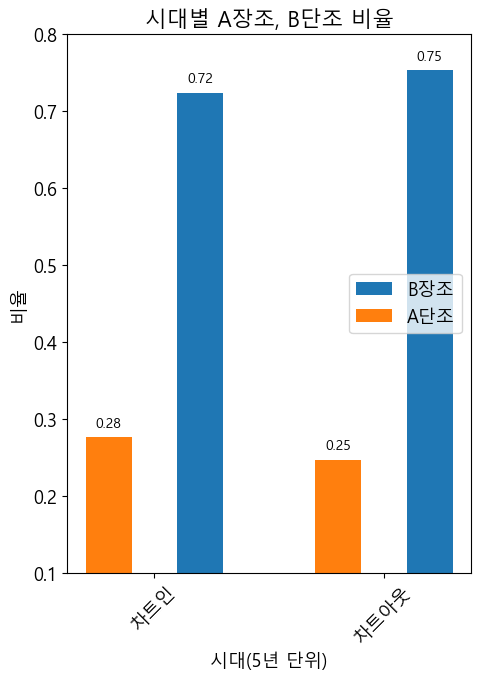

In [36]:
w = 0.2
plt.figure(figsize=(5, 7))

# 막대 그리기
bars1 = plt.bar(np.arange(2) + w, list(df.groupby('classes')['major_minor'].value_counts(normalize=True))[::2], width=w)
bars2 = plt.bar(np.arange(2) - w, list(df.groupby('classes')['major_minor'].value_counts(normalize=True))[1::2], width=w)

# 텍스트 추가
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)

# 기타 설정
plt.title('시대별 A장조, B단조 비율')
plt.legend(['B장조', 'A단조'])
plt.ylim(0.1, 0.8)
plt.xlabel('시대(5년 단위)')
plt.ylabel('비율')
plt.xticks(range(2), ['차트인','차트아웃'], rotation=45)
plt.tight_layout()
plt.show()